In [83]:
import json
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from yfinance import Tickers

from allocator import WeightOptimizer
from evaluation import Evaluation

In [84]:
with open("assets.json") as assets_file:
    assets = json.load(assets_file)
tickers = Tickers(assets)
num_assets = len(assets)

In [85]:
n_iter = 10000
lr = 1e-3
risk_free = 0.027
rf_period = timedelta(252)
w_decay = 0.1

alpha = 0.3
beta = 0.1
gamma = 0.6

start_date = datetime(2017,1,1)
end_date = datetime(2024,1,1)
lookback = timedelta(365)
eval_period = timedelta(30*3)


In [86]:
allocator = WeightOptimizer(n_iter,lr,num_assets,risk_free,rf_period,w_decay)
algo = allocator.optimize_weights
evaluator = Evaluation(algo,tickers,start_date,end_date,lookback,eval_period)
opt_returns, comp_returns = evaluator.compare_returns()

[*********************100%***********************]  30 of 30 completed


Optimizing weights... 
Optimizing weights... 
Optimizing weights... 
Optimizing weights... 
Optimizing weights... 
Optimizing weights... 
Optimizing weights... 
Optimizing weights... 
Optimizing weights... 
Optimizing weights... 
Optimizing weights... 
Optimizing weights... 
Optimizing weights... 
Optimizing weights... 
Optimizing weights... 
Optimizing weights... 
Optimizing weights... 
Optimizing weights... 
Optimizing weights... 
Optimizing weights... 
Optimizing weights... 
Optimizing weights... 
Optimizing weights... 
Optimizing weights... 


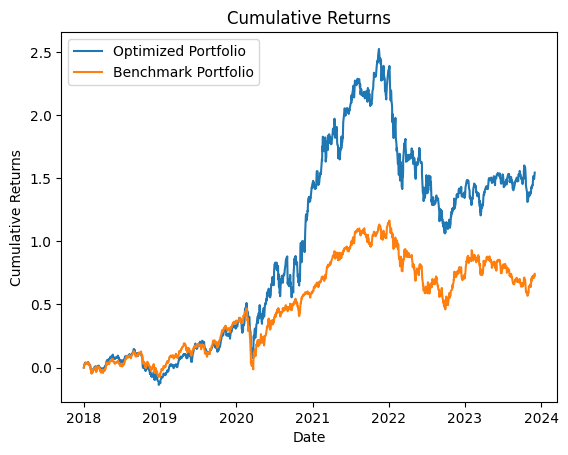

In [87]:
c_opt_ret = np.exp(opt_returns.cumsum()) - 1
c_comp_ret = np.exp(comp_returns.cumsum()) - 1
plt.plot(c_opt_ret, label='Optimized Portfolio')
plt.plot(c_comp_ret, label='Benchmark Portfolio')
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()